<a href="https://colab.research.google.com/github/Qasim-Shah-73/British-Airways/blob/master/British_Airways_Forage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer

In [27]:
# Step 1: Obtaining Data
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [28]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Paid for a 14 hour long fli...
1,✅ Trip Verified | Very inconsiderate PA annou...
2,"✅ Trip Verified | Absolutely terrible, lost m..."
3,✅ Trip Verified | We booked premium economy r...
4,✅ Trip Verified | We chose Rotterdam and Lond...


In [29]:
df.to_csv("data/BA_reviews.csv")

In [30]:
# Step 2: Data cleaning
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stem and remove stop words
    cleaned_text = ' '.join(words)  # Join words back into a string
    return cleaned_text

df['cleaned_reviews'] = df['reviews'].apply(clean_text)

In [31]:
# Step 3: Topic modeling using NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_reviews'])

nmf = NMF(n_components=5, random_state=42)
nmf_topics = nmf.fit_transform(tfidf_matrix)

In [32]:
# Print top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10:-1]]))



Topic 0:
good crew flight cabin food drink club time ba
Topic 1:
airlin british airway servic review fli price ba heathrow
Topic 2:
seat class busi economi premium ba passeng middl row
Topic 3:
delay flight hour bag luggag check arriv board minut
Topic 4:
cancel book flight refund ba custom day voucher told


In [33]:
# Step 4: Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['reviews'].apply(lambda review: sia.polarity_scores(review))
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Categorize reviews into positive, negative, and neutral
df['sentiment_category'] = df['compound_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

# Count the number of positive, negative, and neutral reviews
positive_count = df[df['sentiment_category'] == 'positive'].shape[0]
negative_count = df[df['sentiment_category'] == 'negative'].shape[0]
neutral_count = df[df['sentiment_category'] == 'neutral'].shape[0]

print(f"Number of positive reviews: {positive_count}")
print(f"Number of negative reviews: {negative_count}")
print(f"Number of neutral reviews: {neutral_count}")

Number of positive reviews: 1020
Number of negative reviews: 950
Number of neutral reviews: 30


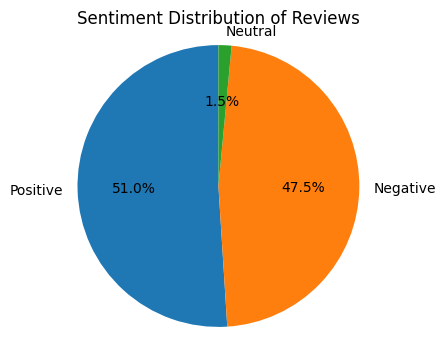

In [37]:
# Calculate the count of positive, negative, and neutral reviews
positive_count = df[df['sentiment_category'] == 'positive'].shape[0]
negative_count = df[df['sentiment_category'] == 'negative'].shape[0]
neutral_count = df[df['sentiment_category'] == 'neutral'].shape[0]

# Create a list of labels and values
labels = ['Positive', 'Negative', 'Neutral']
values = [positive_count, negative_count, neutral_count]

# Create a pie chart
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
ax.set_title('Sentiment Distribution of Reviews')

plt.show()

In [38]:
# Step 5: Word cloud
all_words = ' '.join(df['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

<ipython-input-43-066d3b0559eb>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=words, palette="viridis")


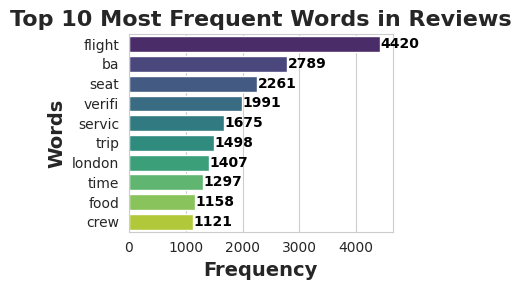

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set Seaborn style
sns.set_style("whitegrid")

# Combine all cleaned reviews into a single string
all_cleaned_reviews = ' '.join(df['cleaned_reviews'])

# Count word frequencies
word_counts = Counter(all_cleaned_reviews.split())

# Sort the word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 most frequent words
top_words = sorted_word_counts[:10]

# Extract word and count into separate lists
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a bar chart
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.barplot(x=counts, y=words, palette="viridis")
ax.set_xlabel('Frequency', fontsize=14, fontweight='bold')
ax.set_ylabel('Words', fontsize=14, fontweight='bold')
ax.set_title('Top 10 Most Frequent Words in Reviews', fontsize=16, fontweight='bold')

# Add data labels
for i, v in enumerate(counts):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='bold')

# Adjust spacing
plt.tight_layout()

# Display the chart
plt.show()


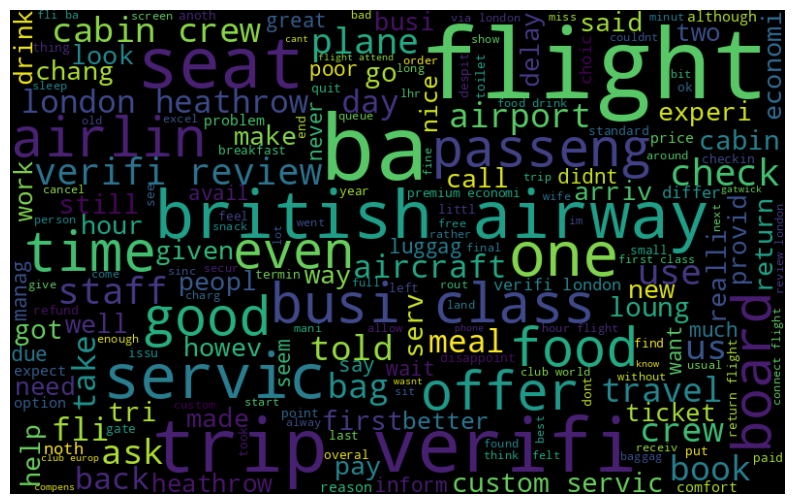

In [35]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()